# TP1 : Transport des électrons dans un matériau semi-conducteur dopé

In [26]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import scipy.optimize
import math 
import os
%matplotlib notebook
from matplotlib.animation import FuncAnimation

# Partie I: Diagramme de bandes et calcul des coefficients de diffusion

Le but de cette partie du TP est de calculer le diagramme de bandes du matériau semi-conducteur ainsi que les coefficients de diffusion des électrons de la bande de conduction et des trous dans la bande de valence de celui-ci.  

# 1- Présentation du modèle continu: problème aux valeurs propres

Nous commençons par présenter le modèle simplifié que nous allons considérer ici pour le calcul de ce diagramme de bandes. On notera dans la suite 
$$
L^2_{\rm per}((0,2\pi); \mathbb{C}):= \left\{ f \in L^2_{\rm loc}(\mathbb{R}; \mathbb{C}), \; f \; 2\pi\mbox{-
périodique} \right\},
$$
$$
H^1_{\rm per}((0,2\pi); \mathbb{C}):= \left\{ f \in L^2_{\rm loc}(\mathbb{R}; \mathbb{C}), \; f' \in L^2_{\rm loc}(\mathbb{R}; \mathbb{C}), \; f \; 2\pi\mbox{-
périodique} \right\},
$$
et
$$
L^\infty_{\rm per}((0,2\pi); \mathbb{R}):= \left\{ f \in L^\infty_{\rm loc}(\mathbb{R}; \mathbb{R}), \; f \; 2\pi\mbox{-
périodique} \right\}.
$$

On suppose que le semiconducteur est composé d'un arrangement infini périodique d'atomes, et on note $a>0$ la distance entre deux atomes. Nous négligeons dans cette partie l'influence des impuretés liées au dopage. 
Dans la suite, pour simplifier, nous supposerons que $a=2\pi$, ce qu'il est possible de faire quitte à rescaler toutes les quantités physiques de manière appropriée. 
On note $V_{\rm per} \in L^\infty_{\rm per}( (0,2\pi); \mathbb{R})$ le potentiel électrique généré par les atomes et les électrons dans le semiconducteur. Nous supposerons dans toute la suite que ce potentiel est bien connu. 


Le moment $q$ d'un électron est un élément $q\in [0,1/2]$. On admettra que, pour tout $q\in [0,1/2]$, il existe une suite croissante de réels $(\epsilon_n(q))_{n\in \mathbb{N}^*}$ tendant vers $+\infty$ et une base hilbertienne $(u_n^q)_{n\in\mathbb{N}^*}$ de $L^2_{\rm per}((0,2\pi); \mathbb{C})$ telle que pour tout $n\in \mathbb{N}^*$, 
$$
- \partial_{yy} u_n^q(y) - 2 \, i \, q \, \partial_y u_n^q(y) + |q|^2 \, u_n^q(y) + V_{\rm per}(y) \, u_n^q(y) = \epsilon_n(q) \, u_n^q(y) \quad \mbox{ pour tout } y\in (0,2\pi).
$$

Attention: Notez bien que les fonctions $u_n^q(y)$ peuvent prendre des valeurs complexes, mais que les $\epsilon_n(q)$ sont des réels. 


On dira que la suite $(\epsilon_n(q))_{n\in \mathbb{N}^*}$ est la suite des valeurs propres de l'opérateur $-\partial_{yy} - 2 \, i \, q \, \partial_y + |q|^2 + V_{\rm per}(y)$ sur $L^2_{\rm per}((0,2\pi); \mathbb{C})$.


Nous allons nous intéresser tout particulièrement aux deux plus petites valeurs propres $\epsilon_1(q)\leq \epsilon_2(q)$. Dans ce modèle simplifié, nous allons supposer que les états d'énergie admissibles de la bande de valence du semiconducteur est égal à l'ensemble des valeurs $\{ \epsilon_1(q) \}_{q\in [0,1/2]}$, et que les états d'énergie admissibles de 
la bande de conduction du semiconducteur est égal à l'ensemble des valeurs $\{ \epsilon_2(q) \}_{q\in [0,1/2]}$.


Une expression simplifiée des coefficients de diffusion $\mu_n$ et $\mu_p$ est alors donnée par:
$$
\mu_p \approx 4 \int_{[0,1/2]} q \, \partial_q \epsilon_1(q) \, dq \quad \mbox{ et } \quad \mu_n \approx - 4 \int_{[0,1/2]} q \, \partial_q \epsilon_2(q) \, dq.
$$

Nous verrons dans la section I.2 une méthode numérique pour calculer une approximation de ces coefficients en utilisant une méthode de Galerkin pour résoudre le problème aux valeurs propres ci-dessus. 

Question 1) Soit $q\in [0,1/2]$. Par un calcul formel, montrer qu'une formulation variationnelle associée au problème aux valeurs propres ci-dessus peut s'écrire: chercher $(u_n^q, \epsilon_n(q))\in H^1_{\rm per}((0,2\pi);\mathbb{C}) \times \mathbb{R}$, solution de
$$
\forall v\in H^1_{\rm per}((0,2\pi); \mathbb{C}), \qquad a(u_n^q, v) = \epsilon_n(q) \, \langle u_n^q,v\rangle_{L^2_{\rm per}},
$$
où pour tout $v,w\in L^2_{\rm per}( (0,2\pi); \mathbb{C})$, 
$$
\langle v,w\rangle_{L^2_{\rm per}}:= \int_0^{2\pi} \overline{v} \, w,
$$
et pour tout $v,w\in H^1_{\rm per}( (0,2\pi); \mathbb{C})$, 
$$
a(v,w):= \int_0^{2\pi} \left( \overline{i \, q \, v + \partial_y v}\right) \left( i \, q \, w + \partial_y w\right) + V_{\rm per} \, \overline{v} \, w.
$$


$\color{blue}{\textrm{Réponse 1}\\}$
$\color{blue}{\textrm{On considère le problème suivant :}}$
$\color{blue}{
\left\{
  \begin{array}{l}
    \textrm{Pour $q\in [0,1/2]$, chercher $(u_n^q, \epsilon_n(q))\in H^1_{\rm per}((0,2\pi);\mathbb{C})$} \\
    \forall v\in H^1_{\rm per}((0,2\pi); \mathbb{C}) \ \ a(u_n^q, v) = \epsilon_n(q)  \langle u_n^q,v\rangle_{L^2_{\rm per}}
  \end{array}
\right. \\
\textrm{où pour tout}\  v,w\in L^2_{\rm per}( (0,2\pi); \mathbb{C}), 
\langle v,w\rangle_{L^2_{\rm per}}:= \int_0^{2\pi} \overline{v} \, w,\\
\textrm{et pour tout}\ v,w\in H^1_{\rm per}( (0,2\pi); \mathbb{C}), 
a(v,w):= \int_0^{2\pi} \left( \overline{i \, q \, v + \partial_y v}\right) \left( i \, q \, w + \partial_y w\right) + V_{\rm per} \, \overline{v} \, w.}$


$\color{blue}{\textrm{On peut particulariser l'égalité}\ a(u_n^q, v) = \epsilon_n(q)  \langle u_n^q,v\rangle_{L^2_{\rm per}}\ \textrm{pour des fonctions}\ \phi \in D((0,2\pi); \mathbb{C}) \subset H^1_{\rm per}((0,2\pi); \mathbb{C}) 
}$ 

$\color{blue}{\textrm{Soit}\  q\in [0,1/2], \ n \in \mathbb{N} \ \textrm{et} \ \phi \in H^1_{\rm per}((0,2\pi); \mathbb{C}) : 
\\}$
$\color{blue}{
\begin{array}{rcl}
    a(u_n^q, \phi) &=& \epsilon_n(q)  \langle u_n^q,\phi\rangle_{L^2_{\rm per}}\\
    \int_0^{2\pi} \left( \overline{i \, q \, u_n^q + \partial_y u_n^q}\right) \left( i \, q \, \phi + \partial_y \phi\right) + V_{\rm per} \, \overline{u_n^q} \, \phi &=&\epsilon_n(q)  \int_0^{2\pi} \overline{u_n^q} \, \phi \\
     \int_0^{2\pi}(|q|^2\overline{u_n^q}+2i\partial_y\overline{u_n^q}-\partial_{yy}\overline{u_n^q}+V_{\rm per} \, \overline{u_n^q} \,) \phi &=&\epsilon_n(q)\int_0^{2\pi} \overline{u_n^q} \, \phi \\
\end{array}\\
}$

$\color{blue}{\textrm{Ainsi, on montre que pour q} \in  [0,1/2], \ \textrm{pour tout n} \in \mathbb{N}^* \textrm{ et pour tout} \ y\in (0,2\pi):}\\$
$\color{blue}{
\begin{array}{lrcl}
        &|q|^2\overline{u_n^q}+2i\partial_y\overline{u_n^q}-\partial_{yy}\overline{u_n^q}+V_{\rm per} \, \overline{u_n^q} &=& \epsilon_n(q)\overline{u_n^q}\\
        \textrm{i.e} &- \partial_{yy} u_n^q(y) - 2 \, i \, q \, \partial_y u_n^q(y) + |q|^2 \, u_n^q(y) + V_{\rm per}(y) \, u_n^q(y) &=& \epsilon_n(q) \, u_n^q(y)
\end{array}
}$

$\color{blue}{\textrm{Afin de montrer cette dernière égalité on a utilisé la densité de} D((0,2\pi); \mathbb{C}) \ \textrm{dans } \ H^1_{\rm per}((0,2\pi); \mathbb{C}). \\}$


$\color{blue}{\textrm{Pour montrer la réciproque il suffit de repasser par les mêmes étapes. On multiplie la dernière égalité à droite par v} \in H^1_{\rm per}((0,2\pi); \mathbb{C}) \ \textrm{et on intègre par rapport à y sur} \ (0,2\pi).}$

Question 2) Montrer que $a$ est une forme bilinéaire continue sur $H^1_{\rm per}((0,2\pi); \mathbb{C}) \times H^1_{\rm per}((0,2\pi); \mathbb{C})$, qui est de plus hermitienne, au sens où $\overline{a(v,w)} = a(w,v)$.  

$\color{blue}{\textrm{Réponse 2}\\}$

$\color{blue}{(i)\ \textrm{Bilinéarité}\\}$
$\color{blue}{\textrm{Soit}\ u,v,w \in H^1_{\rm per}((0,2\pi); \mathbb{C})\\}$
$\color{blue}{\textrm{Soit}\ \lambda \in \mathbb{C}\\}$
$\color{blue}{
\begin{array}{ccl}
a(\lambda u+v,w)&=&\int_0^{2\pi} \left( \overline{i \, q \, (\lambda u+v) + \partial_y (\lambda u+v)}\right) \left( i \, q \, w + \partial_y w\right) + V_{\rm per} \, \overline{(\lambda u+v)} \, w. \\
a(\lambda u+v,w)&=&\overline{\lambda}\int_0^{2\pi} \left( \overline{i \, q \, u + \partial_y u}\right) \left( i \, q \, w + \partial_y w\right) + V_{\rm per} \, \overline{u} \, w + \int_0^{2\pi} \left( \overline{i \, q \, v + \partial_y v}\right) \left( i \, q \, w + \partial_y w\right) + V_{\rm per} \, \overline{v} \, w. \\
a(\lambda u+v,w)&=&\overline{\lambda}a(u,w)+a(v,w)\\
a(u,\lambda v+w)&=&\lambda a(u,v)+a(u,w)
\end{array}
\\}$

$\color{blue}{(ii)\ \textrm{Continuité}\\}$

$\color{blue}{
\begin{array}{ccl}
a(v,w)&=& \int_0^{2\pi} \left( \overline{i \, q \, v + \partial_y v}\right) \left( i \, q \, w + \partial_y w\right) + V_{\rm per} \, \overline{v} \, w.\\
|a(v,w)|&\leq& \int_0^{2\pi} |i \, q \, v + \partial_y v| |i \, q \, w + \partial_y w|+ |V_{\rm per}| \, |v| \, |w|.\\ 
|a(v,w)|&\leq& \int_0^{2\pi}|q|^{2}|v||w|+|q||v||\partial_y w|+|q||w||\partial_y v|+\left|\partial_{y} v \right||\partial y w|+\left|V_{per}\right||v||w|\\
|a(v,w)|&\leq&|q|^{2}\|v\|_{L^{2}}\|\omega\|_{L^{2}}+|q|\|v\|_{L^{2}}\left\|\partial_{y} w\right\|_{L^{2}}+|q|\|w\|_{L^{2}}\|\partial_y v\|_{L^{2}}+\left\|\partial_{y} v\right\|_{L^2}\|\partial_y w\|_{L^{2}}+\left\|v\right\|_{L^2}\|w\|_{L^{2}}\|V_{per}\|_{L^{\infty}}\\
|a(v,w)|&\leq&(|q|^{2}+2|q|+1+\|V_{per}\|_{L^{\infty}})\left\|v\right\|_{H^1}\|w\|_{H^{1}}
\end{array}
\\}$

$\color{blue}{(iii)\ \textrm{hermicité}\\}$
$\color{blue}{\textrm{Soit}\ (v,w) \in H^1_{\rm per}((0,2\pi); \mathbb{C}) \times H^1_{\rm per}((0,2\pi); \mathbb{C})\\}$
$\color{blue}{
\begin{array}{lcclr}
&\overline{a(v,w)}&=& \int_0^{2\pi}\overline{ \left( \overline{i \, q \, v + \partial_y v}\right) \left( i \, q \, w + \partial_y w\right) + V_{\rm per} \, \overline{v} \, w}\\
&\overline{a(v,w)}&=& \int_0^{2\pi} \left( i \, q \, v + \partial_y v\right) \left(\overline{ i \, q \, w + \partial_y w}\right) + V_{\rm per} \, \overline{\overline{v} \, w}&\textrm{car} \ q \ \text{et}\ V_{\rm per}\ \textrm{sont à valeurs réelles.}  \\
&\overline{a(v,w)}&=& \int_0^{2\pi} \left( \overline{i \, q \, w + \partial_y w}\right) \left( i \, q \, v + \partial_y v\right) + V_{\rm per} \, \overline{w} \, v\\
\textrm{Donc} &\overline{a(v,w)}&=&a(w,v)
\end{array}
\\}$

$\color{blue}{(iv)\ \textrm{positivité}\\}$
$\color{blue}{\textrm{Soit}\ v \in H^1_{\rm per}((0,2\pi); \mathbb{C})\\}$
$\color{blue}{
\begin{array}{lccll}
    &a(v,v)&=& \int_0^{2\pi} | i \, q \, v + \partial_y v|^2  + V_{\rm per} \, |v|^2\\
    &a(v,v)&\geq&0&\textrm{car l'intégrande est une somme de carrés, elle est donc positive}
\end{array}
\\}$

$\color{blue}{(v)}$
$\color{blue}{\textrm{Soit}\ v \in  H^1_{\rm per}((0,2\pi); \mathbb{C})\\}$
$\color{blue}{
\begin{array}{lccll}
    &a(v,v)=0&\Rightarrow& \int_0^{2\pi} | i \, q \, v + \partial_y v|^2  + V_{\rm per} \, |v|^2=0\\
    &&\Rightarrow&\forall y\in (0,2\pi)\  | i \, q \, v + \partial_y v|^2  + V_{\rm per} \, |v|^2=0\\
    &&\Rightarrow&\forall y\in (0,2\pi)\  | i \, q \, v + \partial_y v|^2=0 \ \textrm{et} \ V_{\rm per} \, |v|^2=0\\
    &&\Rightarrow&\forall y\in (0,2\pi)\  v=0
\end{array}
\\}$
$\color{blue}{\textrm{Par ailleurs}\ v=0 \Rightarrow a(v,v)=0\\ }$
$\color{blue}{\textrm{Donc}\ v=0 \Leftrightarrow a(v,v)=0\\ }$

Question 3) Montrer que $\epsilon_n(q) = a(u_n^q, u_n^q)$. En déduire que pour tout $n\in \mathbb{N}^*$ et pour tout $q\in [0, 1/2]$, 
$$
\epsilon_n(q) \geq - \|V_{\rm per}\|_{L^\infty}.
$$

$\color{blue}{\textrm{Réponse 3}\\}$
$\color{blue}{\textrm{On sait que}\ (u_n^q)_{n \in \mathbb{N}} \textrm{est une base hilbertienne de } \ L^2_{\rm per}((0,2\pi)), \ \textrm{donc} \ ||u_n^q||_{L^2_{\rm per}}=1 \\}$
$\color{blue}{\textrm{Ainsi on montre que :}\\}$
$\color{blue}{
\begin{array}{ccl}
a(u_n^q, u_n^q)&=&\epsilon_n(q)\langle u_n^q,u_n^q\rangle_{L^2_{\rm per}} \\
a(u_n^q, u_n^q)&=&\epsilon_n(q)||u_n^q||^2_{L^2_{\rm per}} \\
a(u_n^q, u_n^q)&=&\epsilon_n(q)
\end{array}
}$

$\color{blue}{
\begin{array}{ccll}
a(u_n^q, u_n^q)&=& \int_0^{2\pi} \left( \overline{i \, q \, u_n^q + \partial_y u_n^q}\right) \left( i \, q \, u_n^q + \partial_y u_n^q\right) + V_{\rm per} \, \overline{u_n^q} \, u_n^q.\\
a(u_n^q,u_n^q)&=& \int_0^{2\pi}|i \, q \, u_n^q + \partial_y u_n^q|^2+V_{\rm per} \, |u_n^q|^2 \\
a(u_n^q,u_n^q)&\geq&\int_0^{2\pi}V_{\rm per} \, |u_n^q|^2 \\
a(u_n^q,u_n^q)&\geq&-\int_0^{2\pi}||V_{\rm per}||_{L^{\infty}} \, |u_n^q|^2 & \textrm{car}  \ \forall y, ||V_{\rm per}||_{L^{\infty}}\geq|V_{\rm per}(y)|\geq V_{\rm per}(y) \\ 
a(u_n^q,u_n^q)&\geq&-||V_{\rm per}||_{L^{\infty}}
\end{array}
}$



## 2- Approximation numérique du problème aux valeurs propres par méthode de Galerkin

Nous allons résoudre le problème aux valeurs propres ci-dessus par une méthode de Galerkin par modes de Fourier pour calculer des approximations numériques des quantités $\epsilon_1(q)$ et $\epsilon_2(q)$ pour $q\in [0,1/2]$. 

Pour tout $k\in \mathbb{Z}$ et pour tout $y\in (0,2\pi)$, on note $e_k(y):= \frac{1}{\sqrt{2\pi}}e^{i k y}$. On rappelle également que pour deux fonctions 
$u,v\in L^2_{\rm per}((0,2\pi); \mathbb{C})$, on a
$$
\langle u, v \rangle_{L^2}:= \int_0^{2\pi} \overline{u}(y) v(y)\,dy. 
$$
Pour tout $L\in \mathbb{N}^*$, on définit 
$$
V^L:= {\rm Vect}\left\{ e_k, -L \leq k \leq L\right\}.
$$
Pour tout $q\in [0,1/2]$ et $n\in \mathbb{N}^*$, on considère $(u_{n,L}^q, \epsilon_{n,L}(q))\in V^L \times \mathbb{R}$ l'approximation par méthode de Galerkin associée à l'espace de discrétisation $V^L$ du couple $(u_n^q, \epsilon_n(q))$ définie par 
$$
a(u_{n,L}^q, v_L) = \epsilon_{n,L}(q) \, \langle u_{n,L}^q, v_L \rangle_{L^2_{\rm per}}, \quad \forall v_L \in V^L.
$$

On introduit les matrices $H^L:=\left( H^L_{ij}\right)_{1\leq i,j \leq 2L+1}$, $Y^L:=\left( Y^L_{ij}\right)_{1\leq i,j \leq 2L+1}$, $Po^L:= \left(Po^L_{ij}\right)_{1\leq i,j \leq 2L+1}$ et $Id^L:= \left(Id^L_{ij}\right)_{1\leq i,j \leq 2L+1}$, qui sont toutes dans $\mathbb{C}^{(2L+1)\times (2L+1)}$, définies comme suit: pour tout $1\leq i,j \leq 2L+1$, 
$$
H^L_{ij}:= \langle \partial_{y} e_{k_i}, \partial_y e_{k_j} \rangle_{L^2}, \quad Y^L_{ij}:= \langle -i \partial_{y} e_{k_i}, e_{k_j} \rangle_{L^2}, \quad Po^L_{ij} = \langle V_{\rm per}e_{k_i}, e_{k_j}\rangle_{L^2}, \quad Id^L_{ij} = \langle e_{k_i}, e_{k_j}\rangle_{L^2}, 
$$
où 
$$
k_i:= i - L -1 \quad \mbox{ et } \quad k_j := j - L -1.
$$
On remarque que lorsque $1\leq i,j \leq 2L+1$, on a alors $-L \leq k_i, k_j \leq L$. 


On définit également pour tout $q\in [0,1/2]$, 
$$
A^L(q):= H^L + 2 \, q \, Y^L + |q|^2 \, Id^L + Po^L. 
$$

Question 4) Montrer que pour tout $1\leq i,j \leq 2L+1$, 
$$
(A^L(q))_{ij} = a(e_{k_i}, e_{k_j}). 
$$
En déduire que $A^L(q)$ est une matrice hermitienne.

$\color{blue}{\textrm{Réponse 4}\\}$
$\color{blue}{\textrm{Soit}\ i,j \in \mathbb{N}, \, 1\leq i,j \leq 2L+1\\}$
$\color{blue}{
\begin{array}{ccl}
a(e_{k_i}, e_{k_j})&=&\int_0^{2\pi} \left( \overline{i \, q \, e_{k_i} + \partial_y e_{k_i}}\right) \left( i \, q \, e_{k_j} + \partial_y e_{k_j}\right) + V_{\rm per} \, \overline{e_{k_i}} \, e_{k_j} \\
a(e_{k_i}, e_{k_j})&=&\int_0^{2\pi} \left(-i q \overline{\, e_{k_i}} + \partial_y \overline{e_{k_i}}\right) \left( i \, q \, e_{k_j} + \partial_y e_{k_j}\right) + Po^L_{ij} \\
a(e_{k_i}, e_{k_j})&=&\int_0^{2\pi}  |q|^2\overline{e_{k_i}}e_{k_j}-iq\partial_y\overline{e_{k_i}}e_{k_j} + iq\partial_y\overline{e_{k_i}}e_{k_j} + \partial_y\overline{e_{k_i}}\partial_ye_{k_j}+ Po^L_{ij} \\
e_{k_i}, e_{k_j})&=&|q|^2Id^L_{ij}+ qY^L_{ij}+ H^L_{ij} + Po^L_{ij} + \int_0^{2\pi}-iq\partial_y\overline{e_{k_i}}e_{k_j} \\
e_{k_i}, e_{k_j})&=&|q|^2Id^L_{ij}+ 2qY^L_{ij}+ H^L_{ij} + Po^L_{ij}\\
e_{k_i}, e_{k_j})&=&(A^L(q))_{ij} 
\end{array}
}$
$\color{blue}{\textrm{L'avant dernière égalité est obtenue à l'aide d'une intégration par partie.}\\}$
$\color{blue}{\textrm{Montrons que } \ A^L(q) \ \textrm{est hermitienne : }\\}$
$\color{blue}{\textrm{Soit}\ i,j \in \mathbb{N}, \, 1\leq i,j \leq 2L+1\\}$
$\color{blue}{
\begin{array}{ccl}
\overline{(A^L(q))_{ji}}&=&\overline{a(e_{k_j}, e_{k_i})}\\
\overline{(A^L(q))_{ji}}&=&a(e_{k_i}, e_{k_j})\\
\overline{(A^L(q))_{ji}}&=&(A^L(q))_{ij}\\
\end{array}
}$
$\color{blue}{\textrm{Donc} \ A^L(q) \ \textrm{est hermitienne}\\}$




Question 5) Montrer que $(u_{n,L}^q, \epsilon_{n,L}^q)$ est solution du problème aux valeurs propres ci-dessus si et seulement si 
$$
u_{n,L}^q = \sum_{i=1}^{2L+1} U_{n,L}^{i}(q) \, e_{k_i}
$$
où le vecteur $U_{n,L}(q):= (U_{n,L}^{i}(q))_{1\leq i \leq 2L+1} \in \mathbb{C}^{2L+1}$ est solution du problème aux valeurs propres matriciel
$$
A^L(q) \, U_{n,L}(q) = \epsilon_{n,L}(q) \, Id^L \, U_{n,L}(q). 
$$

$\color{blue}{\textrm{Réponse 5}\\}$
$\color{blue}{\textrm{(i) Supposons que}\ u_{n,L}^q = \sum_{i=1}^{2L+1} U_{n,L}^{i}(q) \, e_{k_i} \ \textrm{où le vecteur} \ U_{n,L}(q) \ \textrm{est solution du problème aux valeurs propres matriciel précédent.} \\}$
$\color{blue}{\textrm{Soit}\ j \in \mathbb{N}, \, 1\leq j \leq 2L+1\\}$
$\color{blue}{
\begin{array}{ccl}
a(u_{n,L}^q, e_{k_j})&=&a(\sum_{i=1}^{2L+1} U_{n,L}^{i}(q) \, e_{k_i},e_{k_j})\\
a(u_{n,L}^q, e_{k_j})&=&\sum_{i=1}^{2L+1} \overline{U_{n,L}^{i}(q)} a(e_{k_i},e_{k_j})\\
a(u_{n,L}^q, e_{k_j})&=&\sum_{i=1}^{2L+1}\overline{U_{n,L}^{i}(q)}(A^L(q))_{ij}\\
a(u_{n,L}^q, e_{k_j})&=&\overline{U_{n,L}(q)}^TA^L(q)_j\\
a(u_{n,L}^q, e_{k_j})&=&\overline{A^L(q)U_{n,L}(q)}^T_j\\
a(u_{n,L}^q, e_{k_j})&=&\overline{\epsilon_{n,L}(q) \, Id^L \, U_{n,L}(q)}^T_j\\
a(u_{n,L}^q, e_{k_j})&=&\epsilon_{n,L}(q)\overline{U_{n,L}(q)}^T\overline{Id^L}^T
a(u_{n,L}^q, e_{k_j})&=&\epsilon_{n,L}(q)\sum_{i=1}^{2L+1}\overline{U_{n,L}^{i}(q)}\langle e_{k_i},e_{k_j} \rangle\\
a(u_{n,L}^q, e_{k_j})&=&\epsilon_{n,L}(q)\langle\sum_{i=1}^{2L+1}U_{n,L}^{i}(q) e_{k_i},e_{k_j} \rangle\\
a(u_{n,L}^q, e_{k_j})&=&\epsilon_{n,L}(q)\langle u_{n,L}^q,e_{k_j} \rangle\\
\end{array}
\\}$

$
\color{blue}{\textrm{(ii) Supposons que}\ (u_{n,L}^q, \epsilon_{n,L}^q) \ \textrm{ est solution du problème aux valeurs propres ci-dessus} \\}$

$\color{blue}{(u_{n,L}^q, \epsilon_{n,L}(q))\in V^L \times \mathbb{R}}$
$\color{blue}{\textrm{On peut donc écrire} \ u_{n,L}^q \ \textrm{sous la forme suivante :} \\}$
$\color{blue}{u_{n,L}^q = \sum_{i=1}^{2L+1} W_{n,L}^{i}(q) \, e_{k_i}\ \textrm{avec} \ W_{n,L}(q):= (U_{n,L}^{i}(q))_{1\leq i \leq 2L+1} \in \mathbb{C}^{2L+1}\\} $
$\color{blue}{
\begin{array}{ccl}
a(u_{n,L}^q, e_{k_j})&=&\epsilon_{n,L}(q)\langle u_{n,L}^q,e_{k_j} \rangle\\
a(\sum_{i=1}^{2L+1} W_{n,L}^{i}(q) \, e_{k_i}, e_{k_j})&=&\epsilon_{n,L}(q)\langle\sum_{i=1}^{2L+1} W_{n,L}^{i}(q) \, e_{k_i},e_{k_j} \rangle\\
\sum_{i=1}^{2L+1} \overline{W_{n,L}^{i}(q)} \, a(e_{k_i}, e_{k_j})&=&\epsilon_{n,L}(q)\sum_{i=1}^{2L+1} \overline{W_{n,L}^{i}(q)} \,\langle e_{k_i},e_{k_j} \rangle\\
\sum_{i=1}^{2L+1} \overline{W_{n,L}^{i}(q)} \, (A^L(q))_{ij})&=&\epsilon_{n,L}(q)\sum_{i=1}^{2L+1} \overline{W_{n,L}^{i}(q)} \, Id^L_{ij}\\
\overline{W_{n,L}(q)}^TA^L(q))_j&=&\epsilon_{n,L}(q)\overline{W_{n,L}(q)}^TId^L_{j}\\
A^L(q)^T\overline{W_{n,L}(q)})_j&=&\epsilon_{n,L}(q)(Id^L)^T \overline{W_{n,L}(q)}_j\\
A^L(q)W_{n,L}(q))_j&=&\epsilon_{n,L}(q)\overline{(Id^L)^T} W_{n,L}(q)_j\\
A^L(q)W_{n,L}(q))_j&=&\epsilon_{n,L}(q)(Id^L) W_{n,L}(q)_j\\
\end{array}
\\}$
$\color{blue}{\textrm{La dernière égalité provient du fait que} \ Id^L \ \textrm{est hermitienne}\\}$
$\color{blue}{\textrm{Le vecteur} \ W_{n,L}(q)= (U_{n,L}^{i}(q))_{1\leq i \leq 2L+1} \in \mathbb{C}^{2L+1} \ \textrm{est solution du problème aux valeurs propres matriciel :}\\}$
$\color{blue}{
A^L(q) \, U_{n,L}(q) = \epsilon_{n,L}(q) \, Id^L \, U_{n,L}(q). 
}$

Question 6) Que valent les matrices $Id^L$, $H^L$ et $Y^L$? Remplir les lignes de code ci-dessous. 

$\color{blue}{\textrm{Réponse 6}\\}$
$\color{blue}{\textrm{Soit}\  1\leq i,j \leq 2L+1\\}$
$\color{blue}{
\begin{array}{ccl}
(Id^L)_{ij}&=&\delta_{ij}k_i^2\\
(H^L)_{ij}&=&\delta_{ij}k_i\\
(Y^L)_{ij}&=&\delta_{ij}\\
\end{array}
}$

In [27]:
def getLaplacianMatrix(L): ## renvoie la matrice H^L
    Hmat = np.zeros((2*L+1, 2*L+1), dtype = 'complex')
    for k in range(-L, L+1):
        Hmat[k+L,k+L] =  k**2
    return Hmat

def getiGradientMatrix(L): ## renvoie la matrice Y^L
    Ymat = np.zeros((2*L+1, 2*L+1), dtype = 'complex')
    for k in range(-L, L+1):
        Ymat[k+L,k+L] = k
    return Ymat

def getIdentityMatrix(L): ## renvoie la matrice I^L
    Imat = np.zeros((2*L+1, 2*L+1), dtype = 'complex')
    for k in range(-L, L+1):
        Imat[k+L,k+L] = 1
    return Imat

def getPotentialMatrix(V, L): #renvoie la matrice de multiplication par le potentiel V_{per}, 
    #c'est-à-dire la matrice Po^L

    #Dans cette fonction, V est un vecteur défini comme suit: 
    # si V_{per}(y) = \sum_{p=1}^P a_p \cos(py) + b_p \sin(py) + V_0 avec a_p, b_p et V_0 des reels,
    # alors le vecteur V est defini comme V = [b_{P}, b_{P_1}, ..., b_1, V_0, a_1, ..., a_P] 

    P = int ( (len(V)-1)/2 ) 
    
    Vmat = np.zeros((2*L+1,2*L+1), dtype='complex');
    V0 = V[P];  # the constant coeff
    for k in range(-L,L+1):
        for l in range(-L,L+1):
            kp= k+L
            lp= l+L
            if (k==l):
                Vmat[kp,lp] = V0
            else:
                ind = abs(k-l)
                if (ind <=P):
                    pind = P  + ind
                    Vmat[kp,lp] = V[pind]/2
                
                    pind2 = P -ind
                    if (k>l):
                        b = 0.5*V[pind2]
                        Vmat[kp,lp] = Vmat[kp,lp] + 1j*b
                    else:
                        b = -0.5*V[pind2]
                        Vmat[kp,lp] = Vmat[kp,lp] + 1j*b
    return Vmat

Le but des lignes de codes ci-dessous est de fixer la valeur de $L$, de $V_{\rm per}$ et de définir les matrices $Id^L$, $Po^L$, $H^L$ et $Y^L$. 

In [28]:
L = 100 ## Discretisation en termes de modes de Fourier

V = [0, 0, 1] ## Definition du potentiel V_{per}(y) = cos y
IdL = getIdentityMatrix(L)
PoL = getPotentialMatrix(V, L)
HL = getLaplacianMatrix(L)
YL = getiGradientMatrix(L)

Question 7) Remplir les lignes de code ci-dessous pour définir la fonction qui à $q$ associe la matrice $A^L(q)$. 

In [29]:
def getAL(q): ## Renvoie la matrice A^L(q)
    Amat = HL+2*q*YL+q*q*IdL+PoL
    return Amat

On note alors $\epsilon_{1,L}(q) \leq \epsilon_{2,L}(q) \leq \cdots \leq \epsilon_{2L+1,L}(k)$ les valeurs propres de la matrice $A^L(q)$ (qui est, on le rappelle, de taille $(2L+1) \times (2L+1)$) rangées par valeurs croissantes. On admettra dans la suite que 
$$
\epsilon_{1,L}(q) \mathop{\longrightarrow}_{L\to +\infty} \epsilon_1(q) \quad \mbox{ et } \quad \epsilon_{2,L}(q) \mathop{\longrightarrow}_{L\to +\infty} \epsilon_2(q).  
$$

On notera de plus $U_{1,L}(q), \cdots, U_{2L+1,L}(q) \in \mathbb{C}^{2L+1}$ des vecteurs propres associés de norme $1$ de sorte que
$$
\forall 1\leq n \leq 2L+1, \quad A^{L}(q) \, U_{n,L}(q) = \epsilon_{n,L}(q) \, Id^L \, U_{n,L}(q).
$$

Question 8) Quel est le but de la fonction getSpectrumAL(q) définie dans les lignes de code ci-dessous? 

$\color{blue}{\textrm{Réponse 8}\\}$
$\color{blue}{\textrm{Comme cela est indiqué en commentaire, la fonction getSpectremAl(q) renvoie les valeurs propres} \ \epsilon_{1,L}(q), \epsilon_{2,L}(q) \ \textrm{et les vecteurs propres}\ U_{1,L}(q),  U_{2,L}(q) \\}$
$\color{blue}{\textrm{Cette fonction permet de calculer les coefficients de diffusion dans la sous-partie suivante.}\\}$

In [30]:
def getSpectrumAL(q): 
    ## Renvoie les valeurs propres epsilon_{1,L}(q), epsilon_{2,L}(q) et les vecteurs propres U_{1,L}(q) et U_{2,L}(q)
    A = getAL(q)
    eps, U = np.linalg.eigh(A)
    return eps[0],eps[1],U[:,0],U[:,1]

## 3- Calcul des coefficients de diffusion

Nous allons à présent utiliser les valeurs de $\epsilon_{1,L}(q)$ et $\epsilon_{2,L}(q)$ comme approximations de $\epsilon_1(q)$ et $\epsilon_2(q)$ pour approcher les valeurs de $\mu_n$ et $\mu_p$. Plus précisément, nous allons calculer $\epsilon_{1,L}(q)$ et $\epsilon_{2,L}(q)$, ainsi que $U_{1,L}(q)$ et $U_{2,L}(q)$, pour un nombre $Q$ de valeurs de $q\in [0,1/2]$. Nous utiliserons ensuite ces valeurs pour calculer 
des approximations des coefficients de diffusion $\mu_n$ et $\mu_p$. 

Soit $Q\in \mathbb{N}^*$. Pour tout $0\leq l \leq Q-1$, on définit $q_l:= \frac{l}{2(Q-1)}$ de sorte que $q_0 = 0 < q_1 < \cdots < q_{Q-1} = \frac{1}{2}$. On note $\Delta q := \frac{1}{2(Q-1)}$. 

In [31]:
Q = 50 # nombre de valeurs de q pour lesquelles nous allons resoudre le probleme aux valeurs propres complets 
qq = np.linspace(0, 1/2, Q) 

Question 9) Afficher les valeurs de $\epsilon_{1,L}(q_l)$ et de $\epsilon_{2,L}(q_l)$ pour tout $0\leq l \leq Q-1$.

In [32]:
## Nous allons commencer par afficher les valeurs de epsilon_1^L(q) et epsilon_2^L(q) en fonction de q
eps1 = np.zeros(Q)
eps2 = np.zeros(Q)

for q in range(0,Q):
    eps1q, eps2q, U1q, U2q = getSpectrumAL(qq[q])
    eps1[q] = eps1q
    eps2[q] = eps2q

<IPython.core.display.Javascript object>


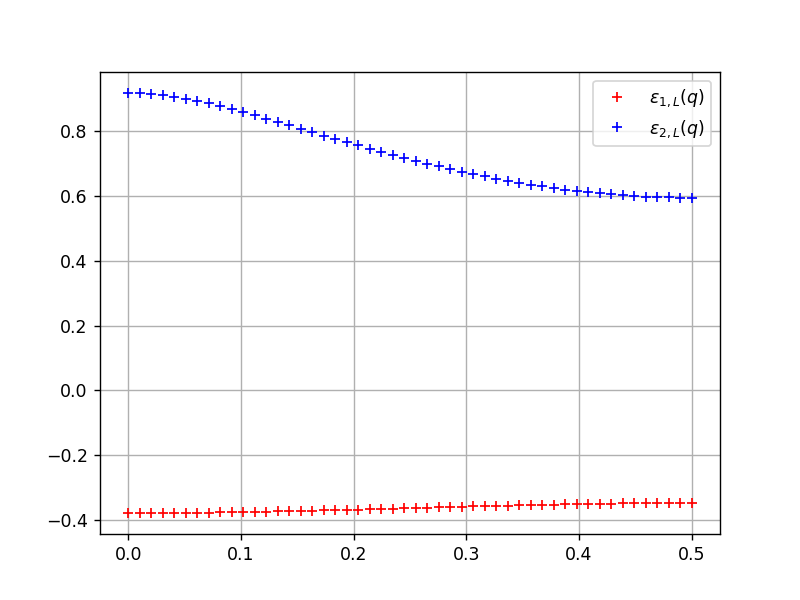

In [33]:
plt.plot(qq,eps1, '+r', label ="$\epsilon_{1,L}(q)$")
plt.plot(qq,eps2, '+b',label ="$\epsilon_{2,L}(q)$")
plt.legend()
plt.grid() #C'est quand même plus joli avec un quadrillage
plt.show()

In [34]:
plt.close()

Dans les lignes de code ci-dessous, les valeurs de $\mu_n$ et $\mu_p$ sont approchées respectivement par:
$$
\mu_p \approx 4 \Delta q \sum_{l=1}^{Q-1} \frac{1}{2}(q_{l-1} + q_{l}) \frac{\epsilon_{1,L}(q_l) - \epsilon_{1,L}(q_{l-1})}{\Delta q},
$$
et 
$$
\mu_n \approx - 4 \Delta q \sum_{l=1}^{Q-1} \frac{1}{2}(q_{l-1} + q_{l}) \frac{\epsilon_{2,L}(q_l) - \epsilon_{2,L}(q_{l-1})}{\Delta q}.
$$

In [35]:
## Calcul des coefficients mu_n et mu_p
dq = (1/2)/(Q-1)
mun = 0
mup = 0

for q in range(0,Q-1):
    mup = mup + dq*(eps1[q+1] - eps1[q])/dq*4*0.5*(qq[q] + qq[q+1])
    mun = mun - dq*(eps2[q+1] - eps2[q])/dq*4*0.5*(qq[q] + qq[q+1])
    
print("mun = ")
print(mun)

print("mup = ")
print(mup)

mun = 
0.27613877023220057
mup = 
0.031456013755282376


Question 10) Justifier pourquoi ces formules d'approximation sont utilisées. On rappelle qu'au niveau continu les coefficients $\mu_n$ et $\mu_p$ sont donnés par les formules données au début de la partie I.

$\color{blue}{\textrm{Réponse 10}\\}$
$\color{blue}{\textrm{Comme cela est expliqué plus haut, on a discrétisé l'intervalle de valeurs pris par q. Cette discrétisation permet  de calculer la valeur de} \epsilon_{1,L}(q),\epsilon_{2,L}(q) \ \textrm{ comme approximations de } \  \epsilon_1(q), \epsilon_2(q)\\}$
$\color{blue}{\textrm{Enfin, ces valeurs approchées sont utilisées afin de calculer les 
approximations des coefficients de diffusion} \mu_n, \mu_p$. \\}$
$\color{blue}{\textrm{Puisque les coefficients de diffusion s'expriment comme des intégrales, on peut évaluer leur approximation à l'aide d'une somme discrète.}}$
$\color{blue}{\textrm{Ici, c'est la méthode des trapèzes qui est utilisée}\\}$

Question 11) Quelles sont les valeurs de $\mu_n$ et $\mu_p$ obtenues?

$\color{blue}{\textrm{Réponse 11}\\}$
$\color{blue}{\mu_n=0.276\\}$
$\color{blue}{\mu_p=0.031}$

# Partie II: Système d'équations de drift-diffusion

## 1 - Méthode de différences finies

Le but de cette partie est de résoudre par une méthode de différences finies le système d'équations couplées:
$$
\left\{
\begin{array}{l}
 - \partial_{xx} v(x,t) = n(x,t) - p(x,t) - c(x)\\
 \partial_t n(x,t) - \mu_n \Big( \partial_x n(x,t) - \partial_x v(x,t) n(x,t) \Big) = - \left( n(x,t)p(x,t) - n_i^2\right)\\
  \partial_t p(x,t) - \mu_p\Big( \partial_x p(x,t) + \partial_x v(x,t) p(x,t) \Big) = - \left( n(x,t)p(x,t) - n_i^2\right)\\
\end{array}
\right.
$$
présenté dans le fichier d'introduction, avec des conditions de bord périodiques en $x\in (-1,1)$ et des conditions initiales $n(x,0) = p(x,0) = n_i$. Nous conservons dans cette partie les mêmes notations que dans le fichier d'introduction. Nous utiliserons les valeurs des coefficients $\mu_n$ et $\mu_p$ calculées dans la partie I du TP.

Pour simplifier, nous supposerons que $c_0 = 1$ et que $n_i = 1$. Quitte à changer les unités du problème de manière adéquate, on peut toujours se ramener à ce cas. 


Soit $X\in \mathbb{N}^*$. On note $\Delta x:= \frac{2}{X}$ et pour tout $i\in \mathbb{Z}$, on notera 
$x_i = -1 + i \Delta x$ de telle sorte que $x_0 = -1 < x_1 < \cdots < x_X = 1$. On notera également pour tout $i \in \mathbb{Z}$, $y_i:= \frac{x_{i-1} + x_i}{2}$. 

In [36]:
X = 70 # Nombre de points de discretisation
xx = np.linspace(-1, 1, X+1)
dx = 2.0/X
xxplot = np.linspace(-1+0.5*dx, 1-0.5*dx, X)

Commençons par discrétiser en espace le système d'équations ci-dessus. Nous cherchons à obtenir pour tout $t>0$, des vecteurs 
$V(t):=(V_i(t))_{1\leq i \leq X}$, $N(t):=(N_i(t))_{1\leq i \leq X}$ et $P(t):= \left( P_i(t)\right)_{1\leq i \leq X}\in\mathbb{R}^X$ tels que pour tout $1\leq i \leq X$, 
$$
v(y_i,t) \approx V_i(t), \quad n(y_i,t) \approx N_i(t), \quad p(y_i,t) \approx P_i(t). 
$$
On note également $C:=(C_i)_{1\leq i \leq X}\in \mathbb{R}^X$ le vecteur défini par
$$
\forall 1\leq i \leq X, \; C_i:= c(y_i).
$$

In [37]:
#Definition du vecteur C
C = np.zeros(X) 
for i in range(0,X): 
    if (i<int(X/2)): 
        C[i] = 1
    else:
        C[i] = -1

A l'instant initial $t=0$, on suppose que $n(x,0) = p(x,0) = 1$. On définit alors $N(0)$ et $P(0)$ comme des vecteurs de taille $X$ dont toutes les composantes valent $1$. 



Pour tout vecteur $U,V\in \mathbb{R}^X$, on notera dans la suite $U\odot V$ le vecteur de taille $X$ tel que 
$$
\forall 1\leq i \leq X, \quad (U\odot V)_i = U_i V_i.
$$

En utilisant les formules d'approximations suivantes:
\begin{align*}
-\partial_{xx} v(y_i,t) & \approx \frac{- v(y_{i+1},t) + 2 v(y_i,t) - v(y_{i-1},t)}{\Delta x^2}\\
\partial_x v(y_i,t) & \approx \frac{v(y_{i+1},t) - v(y_{i-1},t)}{2\Delta x}\\
\partial_x n(y_i,t) & \approx \frac{n(y_{i+1},t) - n(y_{i-1},t)}{2\Delta x}\\
\partial_x p(y_i,t) & \approx \frac{p(y_{i+1},t) - p(y_{i-1},t)}{2\Delta x}
\end{align*}
et en utilisant les conditions aux bords périodiques du problème, on considère le schéma aux différences finis suivants pour approcher le système ci-dessus: pour tout $1\leq i \leq X$, 
$$
\left\{
\begin{array}{l}
\displaystyle \frac{- V_{i+1}(t) + 2 V_i(t) - V_{i-1}(t)}{\Delta x^2} = N_i(t) - P_i(t) - C_i \\
\displaystyle \partial_t N_i(t) - \mu_n\left( \frac{N_{i+1}(t) - N_{i-1}(t)}{2\Delta x}  - \frac{V_{i+1}(t) - V_{i-1}(t)}{2\Delta x} N_i(t) \right) = - \left( N_i(t) P_i(t) - 1 \right)\\
\displaystyle \partial_t P_i(t) - \mu_p\left( \frac{P_{i+1}(t) - P_{i-1}(t)}{2\Delta x} + \frac{V_{i+1}(t) - V_{i-1}(t)}{2\Delta x}  P_i(t) \right) = -  \left( N_i(t) P_i(t) - 1 \right)\\
\end{array}
\right.
$$
Pour donner un sens à toutes les quantités utilisées ci-dessus, nous utilisons le fait que nous avons des conditions de bords périodiques, si bien que $V_{X+1}(t) = V_1(t)$, $V_{-1}(t) = V_{X-1}(t)$ etc.

Question 1) En déduire qu'il existe une matrice $D\in \mathbb{R}^{X\times X}$ et une matrice $G\in \mathbb{R}^{X\times X}$ tel que les vecteurs $V(t)$, $N(t)$ et $P(t)$ sont solutions du système
$$
\left\{
\begin{array}{l}
D V(t) = N(t) - P(t) - C \\
 \displaystyle \frac{dN}{dt}(t) - \mu_n\left( G N(t)  - (G V(t))\odot N(t) \right) = - \left( N(t) \odot P(t) - Z \right)\\
 \displaystyle \frac{dP}{dt}(t) - \mu_p\left( G P(t) + (GV(t))\odot P(t) \right) = -  \left( N(t)\odot P(t) - Z \right)\\
\end{array}
\right.
$$
où $Z\in \mathbb{R}^X$ est le vecteur dont toutes les coordonnées valent $1$. Donner les expressions des matrices $D$ et $G$. Complétez les expressions dans les lignes de code ci-dessous.

$\color{blue}{\textrm{Réponse 1}\\}$
$\color{blue}{\textrm{Les trois équations données ci-dessus sont valables pour tout }1\leq i \leq X\\}$
$\color{blue}{\textrm{Par ailleurs, les membres de gauche s'expriment comme une combinaison linéaire des composantes des vecteurs }V(t) \ \textrm{et} \ N(t)\\}$
$\color{blue}{\textrm{On peut donc introduire une matrice}\ D \in \mathbb{R}^{XxX} \  \textrm{telle que pour tout}\ 2\leq i \leq X-1 :\\}$
$\color{blue}{
\begin{array}{rcl}
DV(t)_i&=&\frac{- V_{i+1}(t) + 2 V_i(t) - V_{i-1}(t)}{\Delta x^2}\\
\sum_{k=1}^X D_{ik}V_k(t)&=&\frac{- V_{i+1}(t) + 2 V_i(t) - V_{i-1}(t)}{\Delta x^2}\\
\end{array}
}$
$\color{blue}{\textrm{Il reste à examiner la première et la denière ligne. A l'aide des égalités fournies par l'énoncé on montre que } D_{11}=D_{XX}=\frac{2}{\Delta x^2}, D_{12}=D_{1X}=D_{X1}=D_{X,X-1}=-\frac{1}{\Delta x^2} \\}$
$\color{blue}{\textrm{Donc, pour}\ 1\leq i \leq X, \ 1\leq k \leq X :\\}$
$\color{blue}{D_{ik}=
\left\{
\begin{array}{cll}
-\frac{1}{\Delta x^2}& \textrm{si}&k=i+1\\
\frac{2}{\Delta x^2}& \textrm{si}&k=i\\
-\frac{1}{\Delta x^2}& \textrm{si}&k=i-1\\
-\frac{1}{\Delta x^2}& \textrm{si}&i=X \ \textrm{et} \ k=1\\
-\frac{1}{\Delta x^2}& \textrm{si}&i=1 \ \textrm{et} \ k=X\\
0 & \textrm{sinon}
\end{array}
\right.}
$



$\color{blue}{\textrm{On peut aussi introduire une matrice}\ G \in \mathbb{R}^{XxX} \  \textrm{telle que pour tout}\ 2\leq i \leq X-1 :\\}$
$\color{blue}{
\begin{array}{rcl}
GV(t)_i&=&\frac{V_{i+1}(t) - V_{i-1}(t)}{2\Delta x}\\
\sum_{k=1}^X G_{ik}V_k(t)&=&\frac{V_{i+1}(t) - V_{i-1}(t)}{2\Delta x}\\
\end{array}
}$
$\color{blue}{\textrm{Il reste à examiner la première et la denière ligne. A l'aide des égalités fournies par l'énoncé on montre que } G_{12}=G_{X1}=\frac{1}{2 \Delta x}, G_{1X}=G_{X,X-1}=-\frac{1}{2 \Delta x} \\}$
$\color{blue}{\textrm{Donc, pour}\ 1\leq i \leq X, \ 1\leq k \leq X :\\}$
$\color{blue}{G_{ik}=
\left\{
\begin{array}{cll}
\frac{1}{2 \Delta x}& \textrm{si}&k=i+1\\
\frac{1}{2 \Delta x}& \textrm{si}&i=X \  \textrm{et} \ k=1\\
-\frac{1}{2 \Delta x}& \textrm{si}&k=i-1\\
-\frac{1}{2 \Delta x}& \textrm{si}&i=1 \  \textrm{et} \ k=X\\
0 & \textrm{sinon}
\end{array}
\right.}
$


In [38]:
# Definition de la matrice identite de taille X * X
I = np.eye(X) 

#Definition du vecteur Z
Z = np.ones(X) 

# Definition de la matrice D
D=np.zeros((X,X))
for i in range (0,X-1):
    D[i,i]=2/(dx*dx)
    D[i,i+1]=-1/(dx*dx)
    D[i+1,i]=-1/(dx*dx)

D[X-1,X-1]=2.0/(dx*dx) 
D[0,X-1]=-1.0/(dx*dx) 
D[X-1,0]=-1.0/(dx*dx)

# Definition de la matrice G: 
G=np.zeros((X,X))
for i in range (1,X-1):
    G[i,i-1]= -1/(2*dx)
    G[i,i+1]= +1/(2*dx)

G[X-1,X-2]=-1.0/(2*dx) 
G[X-1,0]=1.0/(2*dx) 
G[0,X-1]=-1.0/(2*dx) 
G[0,1]=1.0/(2*dx) 

Malheureusement la matrice $D$ n'est pas inversible. 
En effet, le potentiel $v(x,t)$ n'est défini qu'à une constante additive près. 
Plus précisément, si $v(x,t)$ est une solution du système ci-dessus, alors $v(x,t) + v_0$ est également 
solution pour tout $v_0\in \mathbb{R}$. Un moyen pour pallier à ce problème est de choisir la solution $v(x,t)$ telle que $v(y_X,t) = 0$ pour tout $t>0$. En termes de vecteur, il s'agit d'imposer que $V_X(t) = 0$ pour tout $t>0$. 

On note alors $\overline{D}:= (D_{ij})_{1\leq i,j \leq X-1} \in \mathbb{R}^{(X-1)\times (X-1)}$, et pour tout $t>0$, on note 
$$
\overline{V}(t):= (V_i(t))_{1\leq i \leq X-1}, \quad \overline{P}(t):= (P_i(t))_{1\leq i \leq X-1},\quad \overline{N}(t):= (N_i(t))_{1\leq i \leq X-1},\quad \overline{C}:= (C_i)_{1\leq i \leq X-1}.
$$
On admet dans la suite que $\overline{D}$ est inversible. 

Question 2) Montrer que $V(t)$ est solution de l'équation
 $$
 DV(t) = N(t) - P(t) - C
 $$
 avec $V_X(t) = 0$ si et seulement si 
 $$
 \overline{D} \; \overline{V}(t) = \overline{N}(t) - \overline{P}(t) - \overline{C}.
 $$

$\color{blue}{\textrm{Réponse 2}\\}$
$\color{blue}{\textrm{(i) : Si}\ V(t) \ \textrm{est solution de l'équation} \  DV(t) = N(t) - P(t) - C \ \textrm{avec} \ V_X(t) = 0 \ \textrm{alors} \ \overline{D} \; \overline{V}(t) = \overline{N}(t) - \overline{P}(t) - \overline{C} \\}$
$\color{blue}{\textrm{(ii) Si :} \overline{D} \; \overline{V}(t) = \overline{N}(t) - \overline{P}(t) - \overline{C} \\}$

In [39]:
#Definition du vecteur Cbar
Cbar = C[0:(X-1)]

# Definition de la matrice Dbar
Dbar = D[0:(X-1), 0:(X-1)]

Question 3) Que fait la fonction compute\_Potential dans les lignes de code ci-dessous? 

$\color{blue}{\textrm{Réponse 3}\\}$
$\color{blue}{\textrm{La fonction compute_Potential commence par assembler la matrice rhs telle que} : rhs=\overline{N}(t) - \overline{P}(t) - \overline{C}\\}$
$\color{blue}{\textrm{Ensuite cette fonction résout le système } \ \overline{D}Y=rhs, \ Y \textrm{ représente en fait le vecteur } \ \overline{V}.\\}$
$\color{blue}{\textrm{Enfin, le vecteur V, solution du problème est assemblé à partir du vecteur} \ \overline{V}.\\}$

In [40]:
def compute_Potential(N,P):
    Nbar = N[0:(X-1)]
    Pbar = P[0:(X-1)]

    rhs = Nbar - Pbar - Cbar

    y = np.linalg.solve(Dbar,rhs)

    V = np.zeros(X)
    V[0:(X-1)] = y
   
    return V

Question 4) Que fait la fonction compute\_product dans les lignes de code ci-dessous?

$\color{blue}{\textrm{Réponse 4}\\}$
$\color{blue}{\textrm{La fonction compute_product prend en arguments deux vecteurs}\ N,P \ \textrm{et renvoie le vecteur} \ N\odot P.\\}$

In [41]:
def compute_product(N,P):
    R = np.zeros(X)
    for i in range(0,X):
        R[i] = N[i]*P[i]
    return R

Il nous reste à discrétiser ce système d'équations également en temps. Pour cela, on introduit un pas de temps $\Delta t>0$ et on définit pour tout $m\in \mathbb{N}$, $t_m:= m\Delta t$. Pour tout $m\in \mathbb{N}$, $V^m \in \mathbb{R}^X$ sera un vecteur qui approchera $V(t_m)$. De même, 
$N^m$ et $P^m$ seront des vecteurs de $\mathbb{R}^X$ qui approcheront respectivement $N(t_m)$ et $P(t_m)$. On pose donc $N^0:= N(0)$ et $P^0:=P(0)$.

In [42]:
#Definition of the time step
dt = 0.2

# Initial values of the vectors N(t) and P(t)
N0init = np.ones(X) 
P0init = np.ones(X)

N0 = N0init
P0 = P0init

Nous allons utiliser un schéma de discrétisation en temps semi-implicite pour le système semi-dicrétisé obtenu à la question 1 qui va s'écrire comme suit: pour tout $m\in \mathbb{N}$, 

$$
\left\{
\begin{array}{l}
D V^m = N^m - P^m - C \\
\displaystyle \frac{N^{m+1} - N^m}{\Delta t}  - \mu_n\left( G N^{m+1}  - (G V^m)\odot N^{m+1} \right) = - \left( N^m \odot P^m - Z \right)\\
\displaystyle \frac{P^{m+1} - P^m}{\Delta t} - \mu_p\left( G P^{m+1} + (GV^m)\odot P^{m+1} \right) = -  \left( N^m\odot P^m - Z \right)\\
\end{array}
\right.
$$

Question 5) Montrer que $N^{m+1}$ et $P^{m+1}$ sont solutions des équations ci-dessus si et seulement si ils sont solutions de systèmes linéaires de la forme
 $$
 K^m_n N^{m+1} = R_n^m \quad \text{et} \quad K^m_p P^{m+1} = R_p^m
 $$
 où $K^m_n, K^m_p \in \mathbb{R}^{X \times X}$ sont des matrices et $R_n^m, R_p^m \in \mathbb{R}^X$ sont des vecteurs dont on donnera les expressions en fonction de $G$, $V^m$, $N^m$, $P^m$, $Z$, $\mu_p$ et $\Delta t$.

$\color{blue}{\textrm{Réponse 5}\\}$
$\color{blue}{N^{m+1}, P^{m+1} \  \textrm{sont solutions des équations ci-dessus si et seulement si 
ils sont solutions de systèmes linéaires de la forme }  \\ \ K^m_n N^{m+1} = R_n^m \ \textrm{et} \ K^m_p P^{m+1} = R_p^m \ \textrm{avec : }}$

$\color{blue}{
\begin{array}{ccl}
    K^m_n&=&\frac{I_d^X}{\Delta t}-\mu_n(G-\textrm{Diag}(GV^m)) \\
    K^m_p&=&\frac{I_d^X}{\Delta t}-\mu_p(G-\textrm{Diag}(GV^m)) \\
    R_n^m&=&\frac{N^m}{\Delta t}-(N^m \odot P^m - Z )\\
    R_p^m&=&\frac{P^m}{\Delta t}-(N^m \odot P^m - Z )
\end{array}
}$

$\color{blue}{\textrm{Diag est une fonction qui à un vecteur associe une matrice diagonale} \\
\textrm{où la ième composante de la diagonale est égale à la i-ème composante du vecteur}}$

$\color{blue}{\textrm{(i) Si les matrices et vecteurs s'écrivent de la forme suivante alors on montre sans problème que } N^{m+1},  P^{m+1}, \ \textrm{sont solutions de deux dernières équations ci-dessus.}\\}$
$\color{blue}{\textrm{(ii) Réciproquement, il est possible d'écrire ces deux équations sous forme matricielle}\\
\textrm{car elles s'expriment comme des combinaisons linéaires des vecteurs} N^{m+1},  P^{m+1}\\}$

Soit $M\in \mathbb{N}^*$. On définit $V_{tab}, N_{tab}, P_{tab}\in \mathbb{R}^{X \times M}$ les matrices telles que 
$$
V_{tab} = (V^0 | V^1|\cdots|V^{M-1}), \quad N_{tab} = (N^0 | N^1|\cdots|N^{M-1}), \quad V_{tab} = (P^0 | P^1|\cdots|P^{M-1}).
$$

In [43]:
#Number of time steps to be computed
M = 2000

Question 6) Compléter les expressions de $K^m_n$, $K^m_p$, $R_n^m$ et $R_p^m$ dans les lignes de code ci-dessous. 

In [44]:
def resolution_probleme_DD(mun, mup): 
     
    #These tabs will contain the different values of the approximate solution at the different time steps
    Ntab = np.zeros((X,M))
    Ptab = np.zeros((X,M))
    Vtab = np.zeros((X,M))
    
    N = N0
    P = P0
    
    for it in range(0,M):
    
        V = compute_Potential(N,P)

        Ntab[:,it] = N
        Ptab[:,it] = P
        Vtab[:,it] = V

        dV = np.dot(G,V)

        dVmat = np.zeros((X,X))
        for i in range(0,X):
            dVmat[i,i] = dV[i]

        Knmat =  np.eye(X)/dt-mun*(G-dVmat)
        Kpmat =  np.eye(X)/dt-mup*(G-dVmat)

        Rn = N/dt-(compute_product(N,P)-Z)
        Rp = P/dt-(compute_product(N,P)-Z)

        Nnew = np.linalg.solve(Knmat, Rn)
        Pnew = np.linalg.solve(Kpmat,Rp)

        N = Nnew
        P = Pnew
    return Ntab, Ptab, Vtab

Pour résoudre le système de drift-diffusion, nous utilisons les valeurs des paramètres $\mu_n$ et $\mu_p$ calculées à la fin de la partie I du TP.   

In [45]:
# Valeurs des coefficients de diffusion pour la résolution du problème fin
Ntab, Ptab, Vtab = resolution_probleme_DD(mun, mup)

Le but des lignes de code ci-dessous est d'afficher l'évolution des fonctions $n(t,x)$, $p(t,x)$ et $v(t,x)$ calculées avec le schéma implémenté ci-dessus.

<IPython.core.display.Javascript object>


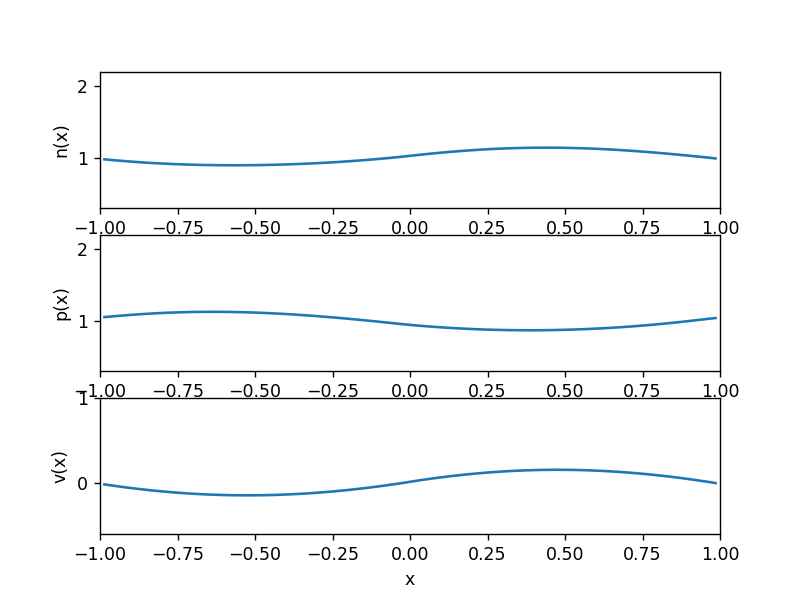

In [46]:
## Le but de cette fonction est d'afficher l'évolution de n(t,x), p(t,x) et v(t,x) au cours du temps
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
plotN,  = ax1.plot(xxplot,Ntab[:,0])
plotP,  = ax2.plot(xxplot,Ptab[:,0])
plotV,  = ax3.plot(xxplot,Vtab[:,0])


def animate(p):
    N = Ntab[:,p]
    plotN.set_ydata(N)    
    
    P = Ptab[:,p]
    plotP.set_ydata(P) 
    
    V = Vtab[:,p]
    plotV.set_ydata(V) 

    
def init(): 
    ax1.set_xlim(-1, 1)
    ax1.set_ylim( 0.3, 2.2)
    ax1.set_xlabel('x')
    ax1.set_ylabel('n(x)') 
    
    ax2.set_xlim(-1, 1)
    ax2.set_ylim( 0.3, 2.2)
    ax2.set_xlabel('x')
    ax2.set_ylabel('p(x)') 
    
    ax3.set_xlim(-1, 1)
    ax3.set_ylim(-0.6, 1.0)
    ax3.set_xlabel('x')
    ax3.set_ylabel('v(x)') 
    
    return plotN,plotP,plotV,

step = 1
steps = np.arange(1,M,step)
ani1 = FuncAnimation(fig, animate,steps, init_func = init, interval = 100, blit = True)

In [22]:
plt.close()

# 2- Calcul de l'énergie potentielle électrique du matériau semi-conducteur

Question 7) Calculer, pour tout $0\leq m < M$ la valeur de l'énergie potentielle électrique du matériau semi-conducteur à l'instant $t_m$, définie comme 
$$
E(t_m) = \int_{-1}^1 v(t_m, x) \ \big( p(t_m, x) - n(t_m, x) \big) \,dx.
$$
Pour ce faire, on utilisera une somme de Riemann pour approcher l'intégrale en $x$ ci-dessus et on utilisera l'approximation des fonctions $v(t,x)$, $p(t,x)$ et $n(t,x)$ obtenue avec la méthode des différences finies. 

$\color{blue}{\textrm{On calcule l'énergie potentielle électrique du matériau semi-conducteur à l'aide de la méthode des trapèzes.}\\}$

In [23]:
def Ener(m): #calcul de la valeur de l'énergie potentielle électrique à l'instant t_m en utilisant une somme de Riemann
    Nm=Ntab[:,m]
    Pm=Ptab[:,m]
    Vm=Vtab[:,m]
    E=0
    for k in range (X-1):
        E+=dx*(Vm[k]*(Pm[k]-Nm[k])+Vm[k+1]*(Pm[k+1]-Nm[k+1]))/2
    return E

Question 8) Tracer les valeurs de $E(t_m)$ pour $0\leq m < M$. Que constatez-vous? 

$\color{blue}{\textrm{Réponse 8}\\}$
$\color{blue}{\textrm{L'energie potentielle électrique du matériau conducteur considéré est représentée ci-après. }\\}$
$\color{blue}{\textrm{On note la présence d'un régime transitoire oscillant caractérisé par un fort amortissement. }\\}$
$\color{blue}{\textrm{Après un temps caractéristique égal à 1/8eme du temps total simulé, l'energie potentielle demeure constante.}\\}$

In [24]:
ener_vec = np.zeros(M)
t_vec = np.zeros(M)
for m in range(0, M):
    t_vec[m] = m*dt
    ener_vec[m] = Ener(m)

<IPython.core.display.Javascript object>


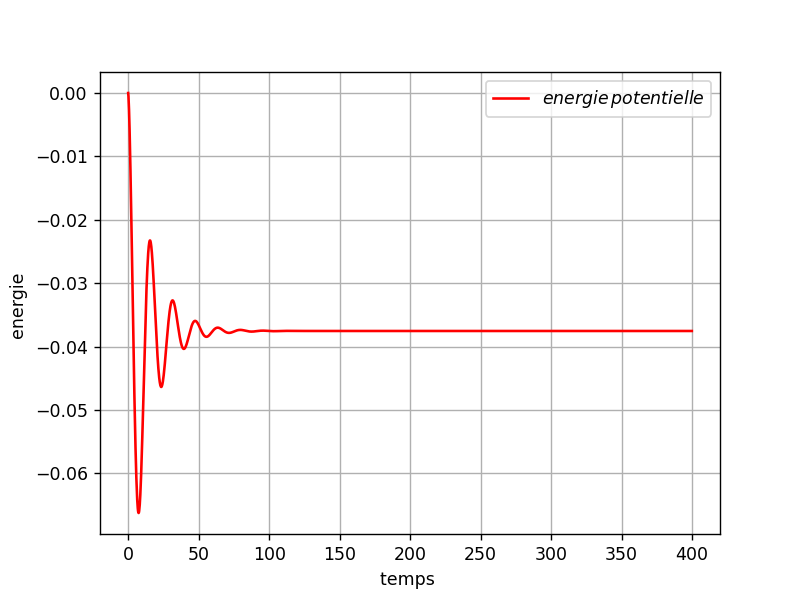

In [50]:
plt.plot(t_vec,ener_vec, 'r', label ="$energie \, potentielle$")
plt.xlabel("temps ")
plt.ylabel("energie ")
plt.grid()
plt.legend()
plt.show()